### Module 8. Consulting Engagment with the Chilean Government
## Amro Shanshal

In [1]:
# Import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Set additional parameters for charts and tables

# Remove column display limits
pd.set_option('display.max_columns', None)
# pd.set_option('display.height', None)
pd.set_option('display.max_rows', None)
# pd.set_option('display.width', None)
plt.rcParams['figure.figsize'] = [15, 10]
sns.set_style("white")

**1. Data Importing and Data Cleaning**

In [11]:
# Read data in csv format, using encoding, and read the third row as column names
chile_data = pd.read_excel("Tourism Chile D1 - D10_updated1019.xlsx",header=3)

In [12]:
# Print
chile_data.head()

,Unnamed: 0,N°,VARIABLE,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,GALERIES,% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP,NUMBER OF EXHIBITS,"ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR",MAJOR SPORTS EVENTS PER YEAR,"OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS",ARTWORK SITES,POPULAR ARCHITECTURE SITES,HISTORICAL SITES,LOCAL MARKETS,CULTURAL SITES LEVEL III (INTERNATIONAL),CULTURA SITES LEVEL II (NATIONAL),CULTURAL SITES LEVEL I (LOCAL),HERITAGE ARCHITECTURAL HOUSES,% OF LAND THAT CORRESPONDS TO FORESTS,NATIONAL PROTECTED SITES (%),% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,TOXIC WASTE DISPOSAL (TONS/100 hab.),NUMBER OF ENVIRONMENTAL COMPLAINTS PRESENTED,ENVIRONMENTAL ISSUES PER MILLION HABITANTS,NUMBER OF BEACHES AND BEACH RESORTS,LAND AFFECTED BY WILDFIRES,NATURAL PROTECTED SITES LEVEL III (INTERNATIONAL),NATURAL PROTECTED SITES LEVEL II (NATIONAL),"RIVERS, LAKES AND WATERFALLS","MOUNTAINS, VOLCANOES AND MOUNTAIN SYSTEMS",GEISERS AND THERMAL CENTERS,PIERS AND SEASHORES,GLACIERS AND WINTER VACATION LOCATIONS,VALLEYS,DESERTS AND DUNES,ISLANDS AND PENINSULAS,PALEONTOLOGY SITES,HIKING TRAILS,PRESERVED SITES,SEASHORE PROTECTED SITES,BIOSHPERE RESERVES,% AVAILABLE WORKFORCE,% POPULATION ORIENTED TOWARDS TOURISM,AVERAGE MONTHLY INCOME (CHILEAN PESOS),5 POPULATION WITH PRIMARY EDUCATION,% POPULATION WITH SECONDARY EDUCATION,AVERAGE NUMBER OF YEARS STUDYING,HIGHER EDUCATION AND TECHNICAL INSTITUTIONS,TOURISM-ORIENTED INSTITUTIONS,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED PROGRAMS,DENSITY OF TOURISM GUIDES (PER 100.000 HABITANTS),CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURISM STANDARDS,% OF TOURISM-RELATED ROOMS AVAILABLE THROUGHOUT THE YEAR,ROOMS PER 1000 HABITANTS,"NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.","TOURISM-RELATED WORKFORCE (PER 10,000 EMPLOYEES)",AVERAGE % OF OCCUPANCY THROUGHOUT THE YEAR,AVERAGE NUMBER OF NIGHTS THAT TOURISTS SPEND,NUMBER OF ESTABLISHMENTS WITH A TOURIST-RELATED CERTIFICATION,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RELATED CERTIFICATIONS,TOURISM-RELATED INVESTEMENTS (MILLION USD) BY CHAMBER OF COMMERCE MEMBERS,TOURISM-RELATED INFRASTRUCTURE INVESTMENT (MILLION USD/YEAR),NATIONAL TOURISTS ARRIVALS,INTERNATIONAL TOURISTS ARRIVALS,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,DENSITY OF AIRPORTS,DENSITY OF ROADS AND HIGHWAYS,% OF ROADS THAT ARE HIGHWAYS (FOUR LINES),NUMBER OF VEHICLES,VISITORS TO PROTECTED SITES,NUMBER OF CRUISES THAT ARRIVE PER YEAR,TOURIST'S ARRIVALS THROUGH BORDER LINES,SECONDARY ROADS (KMS),NUMBER OF INTERNATIONAL BORDER GATES,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants",Ski resorts,Major shopping centers,"Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Number of vineyards,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per

In [13]:
# Remove first 2 columns
chile_data.drop(chile_data.iloc[:, 0:2], inplace = True, axis = 1)
# Print the whole dataframe
chile_data
# As you can see, we cleaned almost everything, but the last row with the aggregated information must be removed too

,VARIABLE,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,GALERIES,% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP,NUMBER OF EXHIBITS,"ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR",MAJOR SPORTS EVENTS PER YEAR,"OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS",ARTWORK SITES,POPULAR ARCHITECTURE SITES,HISTORICAL SITES,LOCAL MARKETS,CULTURAL SITES LEVEL III (INTERNATIONAL),CULTURA SITES LEVEL II (NATIONAL),CULTURAL SITES LEVEL I (LOCAL),HERITAGE ARCHITECTURAL HOUSES,% OF LAND THAT CORRESPONDS TO FORESTS,NATIONAL PROTECTED SITES (%),% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,TOXIC WASTE DISPOSAL (TONS/100 hab.),NUMBER OF ENVIRONMENTAL COMPLAINTS PRESENTED,ENVIRONMENTAL ISSUES PER MILLION HABITANTS,NUMBER OF BEACHES AND BEACH RESORTS,LAND AFFECTED BY WILDFIRES,NATURAL PROTECTED SITES LEVEL III (INTERNATIONAL),NATURAL PROTECTED SITES LEVEL II (NATIONAL),"RIVERS, LAKES AND WATERFALLS","MOUNTAINS, VOLCANOES AND MOUNTAIN SYSTEMS",GEISERS AND THERMAL CENTERS,PIERS AND SEASHORES,GLACIERS AND WINTER VACATION LOCATIONS,VALLEYS,DESERTS AND DUNES,ISLANDS AND PENINSULAS,PALEONTOLOGY SITES,HIKING TRAILS,PRESERVED SITES,SEASHORE PROTECTED SITES,BIOSHPERE RESERVES,% AVAILABLE WORKFORCE,% POPULATION ORIENTED TOWARDS TOURISM,AVERAGE MONTHLY INCOME (CHILEAN PESOS),5 POPULATION WITH PRIMARY EDUCATION,% POPULATION WITH SECONDARY EDUCATION,AVERAGE NUMBER OF YEARS STUDYING,HIGHER EDUCATION AND TECHNICAL INSTITUTIONS,TOURISM-ORIENTED INSTITUTIONS,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED PROGRAMS,DENSITY OF TOURISM GUIDES (PER 100.000 HABITANTS),CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURISM STANDARDS,% OF TOURISM-RELATED ROOMS AVAILABLE THROUGHOUT THE YEAR,ROOMS PER 1000 HABITANTS,"NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.","TOURISM-RELATED WORKFORCE (PER 10,000 EMPLOYEES)",AVERAGE % OF OCCUPANCY THROUGHOUT THE YEAR,AVERAGE NUMBER OF NIGHTS THAT TOURISTS SPEND,NUMBER OF ESTABLISHMENTS WITH A TOURIST-RELATED CERTIFICATION,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RELATED CERTIFICATIONS,TOURISM-RELATED INVESTEMENTS (MILLION USD) BY CHAMBER OF COMMERCE MEMBERS,TOURISM-RELATED INFRASTRUCTURE INVESTMENT (MILLION USD/YEAR),NATIONAL TOURISTS ARRIVALS,INTERNATIONAL TOURISTS ARRIVALS,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,DENSITY OF AIRPORTS,DENSITY OF ROADS AND HIGHWAYS,% OF ROADS THAT ARE HIGHWAYS (FOUR LINES),NUMBER OF VEHICLES,VISITORS TO PROTECTED SITES,NUMBER OF CRUISES THAT ARRIVE PER YEAR,TOURIST'S ARRIVALS THROUGH BORDER LINES,SECONDARY ROADS (KMS),NUMBER OF INTERNATIONAL BORDER GATES,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants",Ski resorts,Major shopping centers,"Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Number of vineyards,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual pa

<span style="color:#1E90FF"> 
    
Print the dimensions: Note it should be **(15, 132)**
</span>

In [14]:
# Print dimensions
chile_data.shape

# We have only 3 columns and more than 1200 rows

(15, 132)

In [15]:
# Rename the first column
chile_data = chile_data.rename(columns={'VARIABLE': 'Region'})

In [16]:
# Print
chile_data

,Region,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,GALERIES,% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP,NUMBER OF EXHIBITS,"ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR",MAJOR SPORTS EVENTS PER YEAR,"OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS",ARTWORK SITES,POPULAR ARCHITECTURE SITES,HISTORICAL SITES,LOCAL MARKETS,CULTURAL SITES LEVEL III (INTERNATIONAL),CULTURA SITES LEVEL II (NATIONAL),CULTURAL SITES LEVEL I (LOCAL),HERITAGE ARCHITECTURAL HOUSES,% OF LAND THAT CORRESPONDS TO FORESTS,NATIONAL PROTECTED SITES (%),% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,TOXIC WASTE DISPOSAL (TONS/100 hab.),NUMBER OF ENVIRONMENTAL COMPLAINTS PRESENTED,ENVIRONMENTAL ISSUES PER MILLION HABITANTS,NUMBER OF BEACHES AND BEACH RESORTS,LAND AFFECTED BY WILDFIRES,NATURAL PROTECTED SITES LEVEL III (INTERNATIONAL),NATURAL PROTECTED SITES LEVEL II (NATIONAL),"RIVERS, LAKES AND WATERFALLS","MOUNTAINS, VOLCANOES AND MOUNTAIN SYSTEMS",GEISERS AND THERMAL CENTERS,PIERS AND SEASHORES,GLACIERS AND WINTER VACATION LOCATIONS,VALLEYS,DESERTS AND DUNES,ISLANDS AND PENINSULAS,PALEONTOLOGY SITES,HIKING TRAILS,PRESERVED SITES,SEASHORE PROTECTED SITES,BIOSHPERE RESERVES,% AVAILABLE WORKFORCE,% POPULATION ORIENTED TOWARDS TOURISM,AVERAGE MONTHLY INCOME (CHILEAN PESOS),5 POPULATION WITH PRIMARY EDUCATION,% POPULATION WITH SECONDARY EDUCATION,AVERAGE NUMBER OF YEARS STUDYING,HIGHER EDUCATION AND TECHNICAL INSTITUTIONS,TOURISM-ORIENTED INSTITUTIONS,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED PROGRAMS,DENSITY OF TOURISM GUIDES (PER 100.000 HABITANTS),CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURISM STANDARDS,% OF TOURISM-RELATED ROOMS AVAILABLE THROUGHOUT THE YEAR,ROOMS PER 1000 HABITANTS,"NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.","TOURISM-RELATED WORKFORCE (PER 10,000 EMPLOYEES)",AVERAGE % OF OCCUPANCY THROUGHOUT THE YEAR,AVERAGE NUMBER OF NIGHTS THAT TOURISTS SPEND,NUMBER OF ESTABLISHMENTS WITH A TOURIST-RELATED CERTIFICATION,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RELATED CERTIFICATIONS,TOURISM-RELATED INVESTEMENTS (MILLION USD) BY CHAMBER OF COMMERCE MEMBERS,TOURISM-RELATED INFRASTRUCTURE INVESTMENT (MILLION USD/YEAR),NATIONAL TOURISTS ARRIVALS,INTERNATIONAL TOURISTS ARRIVALS,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,DENSITY OF AIRPORTS,DENSITY OF ROADS AND HIGHWAYS,% OF ROADS THAT ARE HIGHWAYS (FOUR LINES),NUMBER OF VEHICLES,VISITORS TO PROTECTED SITES,NUMBER OF CRUISES THAT ARRIVE PER YEAR,TOURIST'S ARRIVALS THROUGH BORDER LINES,SECONDARY ROADS (KMS),NUMBER OF INTERNATIONAL BORDER GATES,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants",Ski resorts,Major shopping centers,"Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Number of vineyards,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual part

<span style="color:#1E90FF"> 
    
**Check all the NULL or NaN values in all columns**

In [17]:
# Check with columsn have NaNs 

chile_data.isna().any()

# Only one NaN (LAND AFFECTED BY WILDFIRES) at the first sight, but it is not exactly true

Region                                                                            False
CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR                                     False
NUMBER OF CULTURAL CENTERS                                                        False
WORLD CULTURAL HERITAGE SITES                                                     False
NUMBER OF ARCHEOLOGICAL SITES                                                     False
NATIONAL MONUMENTS                                                                False
MUSEUMS                                                                           False
% OF POPULATION THAT ATTENDS MUSEUMS                                              False
THEATERS                                                                          False
NUMBER OF THEATER PLAYS PER YEAR                                                  False
LIBRARIES                                                                         False
GALERIES                        

In [18]:
chile_data = chile_data.dropna(subset=["LAND AFFECTED BY WILDFIRES"])

<span style="color:#1E90FF"> 
    
**Check the datatype of all columns**

</span>

In [19]:
# Types of columns
#Visualize data types

print(f"{chile_data.dtypes}\n")
# When we see each column by type, we can see that not all of them have integers or floats. Some are objects

Region                                                                             object
CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR                                       int64
NUMBER OF CULTURAL CENTERS                                                          int64
WORLD CULTURAL HERITAGE SITES                                                       int64
NUMBER OF ARCHEOLOGICAL SITES                                                       int64
NATIONAL MONUMENTS                                                                  int64
MUSEUMS                                                                             int64
% OF POPULATION THAT ATTENDS MUSEUMS                                              float64
THEATERS                                                                            int64
NUMBER OF THEATER PLAYS PER YEAR                                                    int64
LIBRARIES                                                                           int64
GALERIES  

**Data Cleaning**

In [20]:
# Print only object columns
chile_data.loc[:, chile_data.dtypes == np.object]
# We can see that not all columns are that clean still, so it is important to double check a dataset

,Region,% OF LAND THAT CORRESPONDS TO FORESTS,LAND AFFECTED BY WILDFIRES,PRESERVED SITES,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,Crime index
0,Arica y Parinacota,-,-,-,1151575,0.513
1,Tarapacá,0.17288,-,5,19560,0.516
2,Antofagasta,-,-,5,22898,0.381
4,Coquimbo,0.77048,1.50057,5,2786,0.396
5,Valparaíso,6.48788,6.63769,5,317309,0.432
6,Metropolitana,6.85241,0.0373581,5,1091111,0.47
7,O'Higgins,11.3085,2.47464,5,-,0.396
8,Maule,12.6985,0.816754,5,3942,0.427
9,Biobío,20.7332,0.725778,5,1546,0.42
10,Araucanía,29.4361,0.157817,5,130713,0.369


In [21]:
# Remove $ 
chile_data = chile_data.replace(r'[<$]', '', regex = True)

In [22]:
# Remove commas from numbers
chile_data = chile_data.replace(',','', regex = True)

In [23]:
# Remove - character
chile_data = chile_data.replace('-','', regex = True)

In [24]:
# Replace empty values with NaNs
chile_data = chile_data.replace(r'^\s*$', np.nan, regex = True)

In [25]:
chile_data

,Region,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,GALERIES,% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP,NUMBER OF EXHIBITS,"ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR",MAJOR SPORTS EVENTS PER YEAR,"OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS",ARTWORK SITES,POPULAR ARCHITECTURE SITES,HISTORICAL SITES,LOCAL MARKETS,CULTURAL SITES LEVEL III (INTERNATIONAL),CULTURA SITES LEVEL II (NATIONAL),CULTURAL SITES LEVEL I (LOCAL),HERITAGE ARCHITECTURAL HOUSES,% OF LAND THAT CORRESPONDS TO FORESTS,NATIONAL PROTECTED SITES (%),% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,TOXIC WASTE DISPOSAL (TONS/100 hab.),NUMBER OF ENVIRONMENTAL COMPLAINTS PRESENTED,ENVIRONMENTAL ISSUES PER MILLION HABITANTS,NUMBER OF BEACHES AND BEACH RESORTS,LAND AFFECTED BY WILDFIRES,NATURAL PROTECTED SITES LEVEL III (INTERNATIONAL),NATURAL PROTECTED SITES LEVEL II (NATIONAL),"RIVERS, LAKES AND WATERFALLS","MOUNTAINS, VOLCANOES AND MOUNTAIN SYSTEMS",GEISERS AND THERMAL CENTERS,PIERS AND SEASHORES,GLACIERS AND WINTER VACATION LOCATIONS,VALLEYS,DESERTS AND DUNES,ISLANDS AND PENINSULAS,PALEONTOLOGY SITES,HIKING TRAILS,PRESERVED SITES,SEASHORE PROTECTED SITES,BIOSHPERE RESERVES,% AVAILABLE WORKFORCE,% POPULATION ORIENTED TOWARDS TOURISM,AVERAGE MONTHLY INCOME (CHILEAN PESOS),5 POPULATION WITH PRIMARY EDUCATION,% POPULATION WITH SECONDARY EDUCATION,AVERAGE NUMBER OF YEARS STUDYING,HIGHER EDUCATION AND TECHNICAL INSTITUTIONS,TOURISM-ORIENTED INSTITUTIONS,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED PROGRAMS,DENSITY OF TOURISM GUIDES (PER 100.000 HABITANTS),CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURISM STANDARDS,% OF TOURISM-RELATED ROOMS AVAILABLE THROUGHOUT THE YEAR,ROOMS PER 1000 HABITANTS,"NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.","TOURISM-RELATED WORKFORCE (PER 10,000 EMPLOYEES)",AVERAGE % OF OCCUPANCY THROUGHOUT THE YEAR,AVERAGE NUMBER OF NIGHTS THAT TOURISTS SPEND,NUMBER OF ESTABLISHMENTS WITH A TOURIST-RELATED CERTIFICATION,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RELATED CERTIFICATIONS,TOURISM-RELATED INVESTEMENTS (MILLION USD) BY CHAMBER OF COMMERCE MEMBERS,TOURISM-RELATED INFRASTRUCTURE INVESTMENT (MILLION USD/YEAR),NATIONAL TOURISTS ARRIVALS,INTERNATIONAL TOURISTS ARRIVALS,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,DENSITY OF AIRPORTS,DENSITY OF ROADS AND HIGHWAYS,% OF ROADS THAT ARE HIGHWAYS (FOUR LINES),NUMBER OF VEHICLES,VISITORS TO PROTECTED SITES,NUMBER OF CRUISES THAT ARRIVE PER YEAR,TOURIST'S ARRIVALS THROUGH BORDER LINES,SECONDARY ROADS (KMS),NUMBER OF INTERNATIONAL BORDER GATES,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants",Ski resorts,Major shopping centers,"Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Number of vineyards,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual part

In [26]:
# Check with columsn have NaNs 

chile_data.isna().any()

Region                                                                            False
CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR                                     False
NUMBER OF CULTURAL CENTERS                                                        False
WORLD CULTURAL HERITAGE SITES                                                     False
NUMBER OF ARCHEOLOGICAL SITES                                                     False
NATIONAL MONUMENTS                                                                False
MUSEUMS                                                                           False
% OF POPULATION THAT ATTENDS MUSEUMS                                              False
THEATERS                                                                          False
NUMBER OF THEATER PLAYS PER YEAR                                                  False
LIBRARIES                                                                         False
GALERIES                        

In [27]:
# Drop 4 columns with many NaNs
chile_data = chile_data.drop(['Ski resorts', 
                                                 'Major shopping centers',
                                                 'Number of vineyards',
                                                 'Governmental resources allocated to tourism promotion ($M)'], axis = 1)

In [48]:
# Impute data in four columns
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
chile_data[['% OF LAND THAT CORRESPONDS TO FORESTS', 
            'LAND AFFECTED BY WILDFIRES', 
            'PRESERVED SITES', 
            'Crime index',
            'NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY']] = imputer.fit_transform(chile_data[['% OF LAND THAT CORRESPONDS TO FORESTS', 
                                                                                                  'LAND AFFECTED BY WILDFIRES', 
            'PRESERVED SITES',
                                                                                                  'Crime index',
            'NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY']])

In [49]:
# Check NaNs in the dataset
chile_data.isnull().sum(axis = 0)
# As we can see below, we do not have any missing values anymore

CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR                                     0
NUMBER OF CULTURAL CENTERS                                                        0
WORLD CULTURAL HERITAGE SITES                                                     0
NUMBER OF ARCHEOLOGICAL SITES                                                     0
NATIONAL MONUMENTS                                                                0
MUSEUMS                                                                           0
% OF POPULATION THAT ATTENDS MUSEUMS                                              0
THEATERS                                                                          0
NUMBER OF THEATER PLAYS PER YEAR                                                  0
LIBRARIES                                                                         0
GALERIES                                                                          0
% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP                           

In [50]:
# Let's check the correlation
cor = chile_data.corr()
cor.loc[:,:] = np.tril(cor, k=-1) 
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]
# We can see a lot of correlated variables here

NATIONAL MONUMENTS                                                              NUMBER OF CULTURAL CENTERS                                                        0.842233
MUSEUMS                                                                         NUMBER OF CULTURAL CENTERS                                                        0.862065
                                                                                NATIONAL MONUMENTS                                                                0.841337
% OF POPULATION THAT ATTENDS MUSEUMS                                            NUMBER OF ARCHEOLOGICAL SITES                                                     0.563522
THEATERS                                                                        NUMBER OF CULTURAL CENTERS                                                        0.807746
                                                                                NATIONAL MONUMENTS                                               

In [51]:
chile_data.dtypes

CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR                                       int64
NUMBER OF CULTURAL CENTERS                                                          int64
WORLD CULTURAL HERITAGE SITES                                                       int64
NUMBER OF ARCHEOLOGICAL SITES                                                       int64
NATIONAL MONUMENTS                                                                  int64
MUSEUMS                                                                             int64
% OF POPULATION THAT ATTENDS MUSEUMS                                              float64
THEATERS                                                                            int64
NUMBER OF THEATER PLAYS PER YEAR                                                    int64
LIBRARIES                                                                           int64
GALERIES                                                                            int64
% OF POPUL

In [53]:
# Converting into numeric
chile_data = chile_data.set_index('Region')

# Select columns
cols = chile_data.loc[:, chile_data.dtypes == np.object].columns

# Convert to numeric
chile_data[cols] = chile_data[cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [36]:
chile_data.dtypes

CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR                                       int64
NUMBER OF CULTURAL CENTERS                                                          int64
WORLD CULTURAL HERITAGE SITES                                                       int64
NUMBER OF ARCHEOLOGICAL SITES                                                       int64
NATIONAL MONUMENTS                                                                  int64
MUSEUMS                                                                             int64
% OF POPULATION THAT ATTENDS MUSEUMS                                              float64
THEATERS                                                                            int64
NUMBER OF THEATER PLAYS PER YEAR                                                    int64
LIBRARIES                                                                           int64
GALERIES                                                                            int64
% OF POPUL

In [54]:
chile_data

,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,GALERIES,% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP,NUMBER OF EXHIBITS,"ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR",MAJOR SPORTS EVENTS PER YEAR,"OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS",ARTWORK SITES,POPULAR ARCHITECTURE SITES,HISTORICAL SITES,LOCAL MARKETS,CULTURAL SITES LEVEL III (INTERNATIONAL),CULTURA SITES LEVEL II (NATIONAL),CULTURAL SITES LEVEL I (LOCAL),HERITAGE ARCHITECTURAL HOUSES,% OF LAND THAT CORRESPONDS TO FORESTS,NATIONAL PROTECTED SITES (%),% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,TOXIC WASTE DISPOSAL (TONS/100 hab.),NUMBER OF ENVIRONMENTAL COMPLAINTS PRESENTED,ENVIRONMENTAL ISSUES PER MILLION HABITANTS,NUMBER OF BEACHES AND BEACH RESORTS,LAND AFFECTED BY WILDFIRES,NATURAL PROTECTED SITES LEVEL III (INTERNATIONAL),NATURAL PROTECTED SITES LEVEL II (NATIONAL),"RIVERS, LAKES AND WATERFALLS","MOUNTAINS, VOLCANOES AND MOUNTAIN SYSTEMS",GEISERS AND THERMAL CENTERS,PIERS AND SEASHORES,GLACIERS AND WINTER VACATION LOCATIONS,VALLEYS,DESERTS AND DUNES,ISLANDS AND PENINSULAS,PALEONTOLOGY SITES,HIKING TRAILS,PRESERVED SITES,SEASHORE PROTECTED SITES,BIOSHPERE RESERVES,% AVAILABLE WORKFORCE,% POPULATION ORIENTED TOWARDS TOURISM,AVERAGE MONTHLY INCOME (CHILEAN PESOS),5 POPULATION WITH PRIMARY EDUCATION,% POPULATION WITH SECONDARY EDUCATION,AVERAGE NUMBER OF YEARS STUDYING,HIGHER EDUCATION AND TECHNICAL INSTITUTIONS,TOURISM-ORIENTED INSTITUTIONS,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED PROGRAMS,DENSITY OF TOURISM GUIDES (PER 100.000 HABITANTS),CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURISM STANDARDS,% OF TOURISM-RELATED ROOMS AVAILABLE THROUGHOUT THE YEAR,ROOMS PER 1000 HABITANTS,"NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.","TOURISM-RELATED WORKFORCE (PER 10,000 EMPLOYEES)",AVERAGE % OF OCCUPANCY THROUGHOUT THE YEAR,AVERAGE NUMBER OF NIGHTS THAT TOURISTS SPEND,NUMBER OF ESTABLISHMENTS WITH A TOURIST-RELATED CERTIFICATION,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RELATED CERTIFICATIONS,TOURISM-RELATED INVESTEMENTS (MILLION USD) BY CHAMBER OF COMMERCE MEMBERS,TOURISM-RELATED INFRASTRUCTURE INVESTMENT (MILLION USD/YEAR),NATIONAL TOURISTS ARRIVALS,INTERNATIONAL TOURISTS ARRIVALS,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,DENSITY OF AIRPORTS,DENSITY OF ROADS AND HIGHWAYS,% OF ROADS THAT ARE HIGHWAYS (FOUR LINES),NUMBER OF VEHICLES,VISITORS TO PROTECTED SITES,NUMBER OF CRUISES THAT ARRIVE PER YEAR,TOURIST'S ARRIVALS THROUGH BORDER LINES,SECONDARY ROADS (KMS),NUMBER OF INTERNATIONAL BORDER GATES,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants","Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual participating on a strike,Banks per one million habitants,Temporar

**3. Principal Component Analysis**

In [55]:
# Finally, we need to standardize data for applying PCA

# Create a copy
chile_data_s = chile_data.copy()

# Standardize
scaler = StandardScaler()
chile_data_s.loc[:, chile_data_s.columns != 'Region'] = scaler.fit_transform(chile_data_s.loc[:, chile_data_s.columns != 'Region'])

pass

In [56]:
# Print
chile_data_s
# AS you can see, our data was standardized and now we can start our PCA

,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,GALERIES,% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP,NUMBER OF EXHIBITS,"ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR",MAJOR SPORTS EVENTS PER YEAR,"OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS",ARTWORK SITES,POPULAR ARCHITECTURE SITES,HISTORICAL SITES,LOCAL MARKETS,CULTURAL SITES LEVEL III (INTERNATIONAL),CULTURA SITES LEVEL II (NATIONAL),CULTURAL SITES LEVEL I (LOCAL),HERITAGE ARCHITECTURAL HOUSES,% OF LAND THAT CORRESPONDS TO FORESTS,NATIONAL PROTECTED SITES (%),% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,TOXIC WASTE DISPOSAL (TONS/100 hab.),NUMBER OF ENVIRONMENTAL COMPLAINTS PRESENTED,ENVIRONMENTAL ISSUES PER MILLION HABITANTS,NUMBER OF BEACHES AND BEACH RESORTS,LAND AFFECTED BY WILDFIRES,NATURAL PROTECTED SITES LEVEL III (INTERNATIONAL),NATURAL PROTECTED SITES LEVEL II (NATIONAL),"RIVERS, LAKES AND WATERFALLS","MOUNTAINS, VOLCANOES AND MOUNTAIN SYSTEMS",GEISERS AND THERMAL CENTERS,PIERS AND SEASHORES,GLACIERS AND WINTER VACATION LOCATIONS,VALLEYS,DESERTS AND DUNES,ISLANDS AND PENINSULAS,PALEONTOLOGY SITES,HIKING TRAILS,PRESERVED SITES,SEASHORE PROTECTED SITES,BIOSHPERE RESERVES,% AVAILABLE WORKFORCE,% POPULATION ORIENTED TOWARDS TOURISM,AVERAGE MONTHLY INCOME (CHILEAN PESOS),5 POPULATION WITH PRIMARY EDUCATION,% POPULATION WITH SECONDARY EDUCATION,AVERAGE NUMBER OF YEARS STUDYING,HIGHER EDUCATION AND TECHNICAL INSTITUTIONS,TOURISM-ORIENTED INSTITUTIONS,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED PROGRAMS,DENSITY OF TOURISM GUIDES (PER 100.000 HABITANTS),CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURISM STANDARDS,% OF TOURISM-RELATED ROOMS AVAILABLE THROUGHOUT THE YEAR,ROOMS PER 1000 HABITANTS,"NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.","TOURISM-RELATED WORKFORCE (PER 10,000 EMPLOYEES)",AVERAGE % OF OCCUPANCY THROUGHOUT THE YEAR,AVERAGE NUMBER OF NIGHTS THAT TOURISTS SPEND,NUMBER OF ESTABLISHMENTS WITH A TOURIST-RELATED CERTIFICATION,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RELATED CERTIFICATIONS,TOURISM-RELATED INVESTEMENTS (MILLION USD) BY CHAMBER OF COMMERCE MEMBERS,TOURISM-RELATED INFRASTRUCTURE INVESTMENT (MILLION USD/YEAR),NATIONAL TOURISTS ARRIVALS,INTERNATIONAL TOURISTS ARRIVALS,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,DENSITY OF AIRPORTS,DENSITY OF ROADS AND HIGHWAYS,% OF ROADS THAT ARE HIGHWAYS (FOUR LINES),NUMBER OF VEHICLES,VISITORS TO PROTECTED SITES,NUMBER OF CRUISES THAT ARRIVE PER YEAR,TOURIST'S ARRIVALS THROUGH BORDER LINES,SECONDARY ROADS (KMS),NUMBER OF INTERNATIONAL BORDER GATES,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants","Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual participating on a strike,Banks per one million habitants,Temporar

**3.1. Eigenvalues and eigenvectors**

In [57]:
# Calculate eigenvalues and vectors
cov_mat = np.cov(chile_data_s.T)
eig_val, eig_vec = np.linalg.eig(cov_mat)

# Print 
print('Eigenvectors \n%s' %eig_vec)
print('\nEigenvalues \n%s' %eig_val)

Eigenvectors 
[[ 1.14181488e-02+0.j         -1.45375834e-01+0.j
  -7.78308004e-02+0.j         ...  1.58137386e-02+0.00542303j
   1.58137386e-02-0.00542303j  4.62100866e-16+0.j        ]
 [-1.39714515e-01+0.j         -2.10858695e-02+0.j
   1.04281300e-02+0.j         ... -5.30501215e-03-0.00170556j
  -5.30501215e-03+0.00170556j -8.50920723e-17+0.j        ]
 [-1.09430936e-02+0.j         -2.38693280e-02+0.j
  -1.63761820e-01+0.j         ... -1.36243788e-02-0.00225591j
  -1.36243788e-02+0.00225591j -2.21979172e-16+0.j        ]
 ...
 [ 2.08575895e-02+0.j         -5.06413442e-02+0.j
  -3.23291317e-02+0.j         ...  2.09146048e-01+0.03686268j
   2.09146048e-01-0.03686268j  2.03315065e-15+0.j        ]
 [-1.21824428e-01+0.j         -5.23142453e-02+0.j
   6.54226802e-02+0.j         ...  5.83199369e-02-0.02565377j
   5.83199369e-02+0.02565377j  1.07538099e-15+0.j        ]
 [ 1.94757198e-02+0.j         -1.02528759e-01+0.j
   3.93857624e-02+0.j         ... -5.09391039e-02+0.07357075j
  -5.09391039e

<span style="color:#1E90FF"> 
    
**Perform PCA and find out explained variance**

</span>

In [58]:
PCA(n_components = chile_data_s.shape[1])

PCA(copy=True, iterated_power='auto', n_components=127, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [59]:
# Fit PCA using All Components

#.fit_transform

myPCA = PCA(n_components = chile_data_s.shape[0])

#myPCA = PCA(n_components = 2)
x = myPCA.fit(chile_data_s)


<span style="color:#1E90FF"> 
    
**Create a graph(barchart) with Explained Variance on Yaxis by each component on X axis**

</span>

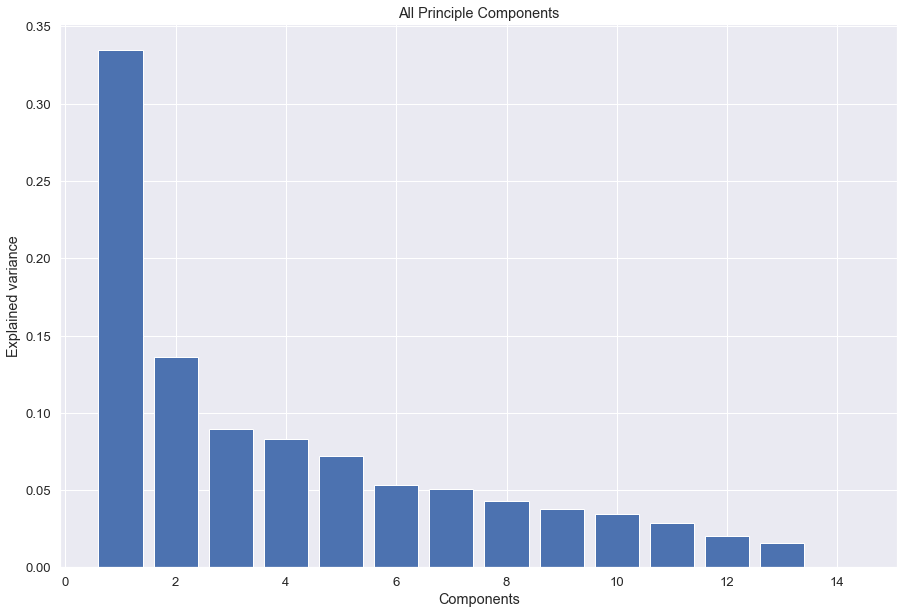

In [60]:
# Plotting the varaince explained by each component
plt.bar(range(1, len(x.explained_variance_ ) + 1), x.explained_variance_ratio_)
plt.ylabel("Explained variance")
plt.xlabel("Components")
plt.title("All Principle Components")
pass

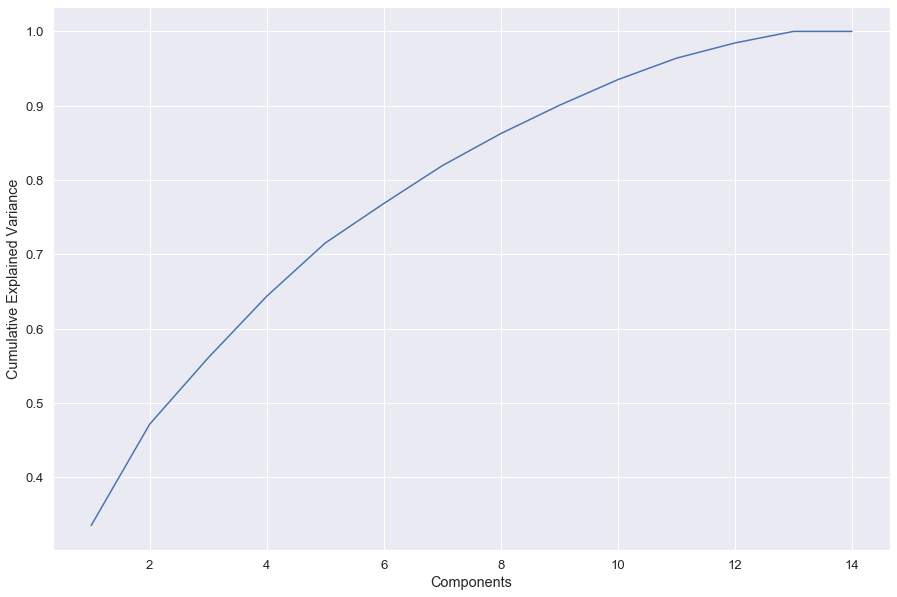

In [61]:
# Deciding on the number of principal componenets to chose
plt.plot(range(1, len(x.explained_variance_)+1), x.explained_variance_ratio_.cumsum())
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Components')
pass

In [62]:
# Calculate the numeric values of principal components
x.explained_variance_ratio_.cumsum()

array([0.33505255, 0.47146514, 0.56079712, 0.64358283, 0.7153018 ,
       0.76841383, 0.81938739, 0.86254245, 0.90053647, 0.93510858,
       0.96397873, 0.98448384, 1.        , 1.        ])

<span style="color:#1E90FF"> 
    
**Perform PCA with 6 components because it captures 75% of the variance**

</span>

In [68]:
myPCA = PCA(n_components = 6)
pca_6 = myPCA.fit(chile_data_s)

In [69]:
# Explore the importance of each feature for principle components
vars = myPCA.explained_variance_ratio_
c_names = chile_data_s.columns
sum = 0

print('Variance:  Projected dimension')

for idx, row in enumerate(pca_6.components_):
    print('\n------------------------------\n')
    output = '{0:4.1f}%:    '.format(100.0 * vars[idx])
    output += " + ".join("{0:5.2f} * {1:s}".format(val, name) \
                      for val, name in zip(row, c_names))
    sum += 100*vars[idx]
    print(output)

print('\n-------------------------------------------------\n')

print('Total variance explained by the 6 components {0:4.1f}%'.format(sum))

Variance:  Projected dimension

------------------------------

33.5%:    -0.01 * CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR +  0.14 * NUMBER OF CULTURAL CENTERS +  0.01 * WORLD CULTURAL HERITAGE SITES + -0.01 * NUMBER OF ARCHEOLOGICAL SITES +  0.15 * NATIONAL MONUMENTS +  0.14 * MUSEUMS +  0.03 * % OF POPULATION THAT ATTENDS MUSEUMS +  0.14 * THEATERS +  0.14 * NUMBER OF THEATER PLAYS PER YEAR +  0.14 * LIBRARIES +  0.15 * GALERIES + -0.07 * % OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP +  0.14 * NUMBER OF EXHIBITS + -0.01 * ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR + -0.00 * MAJOR SPORTS EVENTS PER YEAR +  0.05 * OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS + -0.00 * ARTWORK SITES + -0.04 * POPULAR ARCHITECTURE SITES +  0.02 * HISTORICAL SITES +  0.05 * LOCAL MARKETS +  0.03 * CULTURAL SITES LEVEL III (INTERNATIONAL) +  0.10 * CULTURA SITES LEVEL II (NATIONAL) +  0.15 * CULTURAL SITES LEVEL I (LOCAL) +  0.07 * HERITAGE ARCHITECTURAL HOUSES + -0.05 

In [89]:
# We also can see this information for each component separately
# For instance, these are results for the Principal Component 1 (sorted)
# The same logic can be applied to all other principal components
pd.DataFrame({"Column Name":list(chile_data_s.columns), "PC_1":list(pca_7.components_[0])}).sort_values(by = "PC_1", ascending = False)

,Column Name,PC_1
55,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED ...,0.189777
75,NUMBER OF VEHICLES,0.189471
10,GALERIES,0.188254
4,NATIONAL MONUMENTS,0.188108
26,% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,0.188043
56,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED...,0.187697
22,CULTURAL SITES LEVEL I (LOCAL),0.185818
54,TOURISM-ORIENTED INSTITUTIONS,0.185733
58,CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURIS...,0.185620
66,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RE...,0.184790


In [90]:
# Calculate loadings
myPCA = PCA(n_components = 7)
pca_model = myPCA.fit(chile_data_s)

# Print
print("The loadings are are \n {}".format(pca_model.components_))

The loadings are are 
 [[-0.00641154  0.18292894  0.03344717 -0.00614085  0.188108    0.17842356
   0.04485816  0.1796374   0.17528774  0.18135623  0.18825399 -0.1002251
   0.17618908 -0.00960955 -0.0030819   0.07943563 -0.00772428 -0.02976294
   0.03226378  0.05725968  0.06086665  0.14545875  0.18581827  0.11633003
  -0.08366039 -0.10353553  0.18804291 -0.00161635  0.17014759  0.00905941
   0.03396039  0.04613005 -0.07385749 -0.07749767 -0.07974227 -0.07832346
  -0.03805423 -0.03974426 -0.06531638  0.05750891 -0.02562575 -0.03742093
  -0.0289953  -0.0128566  -0.04780714  0.02116084 -0.05679753  0.00507413
   0.05231212 -0.00462822 -0.05595024 -0.00557174  0.09463399 -0.12795152
   0.18573317  0.18977745  0.18769695 -0.08806233  0.18561959  0.15037484
  -0.12329704  0.15426934 -0.07905521  0.11682141  0.03736976  0.07786
   0.18479025  0.15674986  0.06664837  0.14774234  0.17231861  0.10101123
  -0.00927244 -0.1320863   0.17016578  0.18947139 -0.0127282   0.00144743
   0.1537541   0.04

In [91]:
# Calculate factor scores
pca_model = myPCA.fit_transform(chile_data_s)
PCcomponents = pd.DataFrame(data = pca_model, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
print("\n The Factor scores are")
PCcomponents


 The Factor scores are


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-2.543592,1.159661,0.413233,-1.626668,-2.094679,4.545555,-3.031065
1,-1.604108,1.965840,0.644303,-3.630344,2.131530,2.231926,-0.585468
2,-1.152217,2.932168,1.381509,-3.612081,2.481270,0.899137,4.017945
3,-0.077095,-3.117615,3.079136,-2.212330,1.453327,-3.890439,-3.164841
4,5.243605,-3.502303,8.359365,1.280536,-2.093373,0.635447,1.680159
5,15.525288,4.029490,-2.950616,0.278536,-1.350478,-0.399799,-1.264088
6,-0.744404,-4.901716,-1.705148,-2.145272,-1.040688,-0.260565,-0.737999
7,-1.088401,-3.547910,-2.636278,-0.681100,-0.174348,0.358693,-0.123322
8,2.122697,-1.429870,-3.216593,-1.295355,2.568941,-1.658472,2.838740
9,-1.580023,-3.571196,-3.241816,4.655539,-2.956846,1.383654,2.270178


Finally, we can visualize an example how variables can contribute to diffent principal components.

For instance, we can pick several variables and see how does each variable contribute to each of our seven components.

In our specific case we selected `CULTURAL HERITAGE`, `NATURAL RESOURCES`, `WORKFORCE DEVELOPMENT`, `TOURISM INFRASTRUCTURE`, and `TOURISM MOBILITY`.

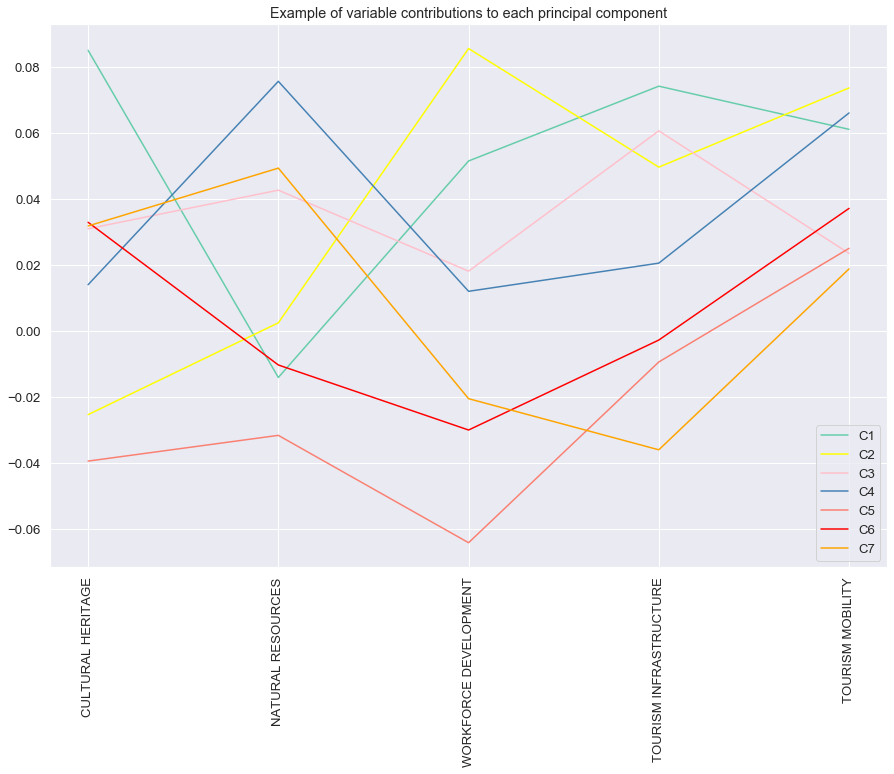

In [92]:
# Example of different variables in each component

# Fit the model
myPCA = PCA(n_components = 7)
pca_model = myPCA.fit(chile_data_s)
y_axis = [0,0,0,0,0,0,0]
for i in range(0,7):
    y_axis[i]=[np.mean(pca_model.components_[i][0:24]), np.mean(pca_model.components_[i][24:47]), 
               np.mean(pca_model.components_[i][47:59]), np.mean(pca_model.components_[i][59:69]),
               np.mean(pca_model.components_[i][69:81])]
# Plot
x_axis = ['CULTURAL HERITAGE', 'NATURAL RESOURCES', 'WORKFORCE DEVELOPMENT', 'TOURISM INFRASTRUCTURE', 'TOURISM MOBILITY']
plt.plot(x_axis,y_axis[0], color = 'mediumaquamarine', label = "C1")
plt.plot(x_axis,y_axis[1], color = 'yellow', label = "C2")
plt.plot(x_axis,y_axis[2], color = 'pink', label = "C3")
plt.plot(x_axis,y_axis[3], color = 'steelblue', label = "C4")
plt.plot(x_axis,y_axis[4], color = 'salmon', label = "C5")
plt.plot(x_axis,y_axis[5], color = 'red', label = "C6")
plt.plot(x_axis,y_axis[6], color = 'orange', label = "C7")
plt.xticks(rotation = 90)
plt.title('Example of variable contributions to each principal component')
plt.legend()
pass

**4. Developing a scoring system for 5 dimensions**

**Developing a scoring methodology is the most tricky part of the assignment and should be taken carefully.**. Different consultants can offer different scoring methodologies and cover that their approach is correct. 

However, this is an example of a scoring system, which can be applied.

**Methodology steps:**

**Step 1 - Calculate a weighted average for each variable in principal components.** 

Multiply the percentage value of the explained variance by the percentage value of a feature in the selected principal component. As a result, a **weighted average** will be a new column in the dataframe with principal components.

In [93]:
# Creating a dataframe of weights
weights = pd.DataFrame(np.column_stack((chile_data_s.columns, pca_model.components_[0] * 
                                        pca_model.explained_variance_ratio_[0],
                                        pca_model.components_[1] * pca_model.explained_variance_ratio_[1],
                                        pca_model.components_[2] * pca_model.explained_variance_ratio_[2],
                                        pca_model.components_[3] * pca_model.explained_variance_ratio_[3],
                                        pca_model.components_[4] * pca_model.explained_variance_ratio_[4],
                                        pca_model.components_[5] * pca_model.explained_variance_ratio_[5],
                                        pca_model.components_[6] * pca_model.explained_variance_ratio_[6])))
weights = weights.set_index(0)

# Create a weighted average
weights['weighted_average'] = weights.sum(axis = 1)/np.sum(pca_model.explained_variance_ratio_)

# Print
weights.head()

,1,2,3,4,5,6,7,weighted_average
0,,,,,,,,
CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,-0.00200057,-0.0287315,-0.00151732,-0.00648572,-0.00957822,0.00573547,-0.00873104,-0.060538
NUMBER OF CULTURAL CENTERS,0.0570788,-0.00214907,-0.000592787,0.00891935,0.00212293,-0.00169527,0.00393578,0.079783
WORLD CULTURAL HERITAGE SITES,0.0104364,-0.0118283,0.0251186,0.00569281,0.00326862,0.00571532,0.00119385,0.046720
NUMBER OF ARCHEOLOGICAL SITES,-0.00191611,0.00152139,0.019696,-0.0147253,-0.00331419,0.0156864,0.00365265,0.024306
NATIONAL MONUMENTS,0.0586948,0.0072686,-0.00173916,0.00265858,-0.00492932,0.000491015,0.000434641,0.074189


**Step 2. Calculate a score for each dimension.**

Multiply weighted average of a variable by each standartized value in each column and sum up results, receiving a final score. 

As a result, we multiply:
    
- `weighted average` for `CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR` (-0.045576) in the dataframe `weights` by each value in the `CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR` column in the dataframe `chile_data_s`.

- Do the same for all weighted averages and columns in respective dataframe

- Sum up the product of multiplications and **receive the score for the first dimension**

In [101]:
# Ranking for dimension 1: CULTURAL HERITAGE AND EVENTS

# Create a dataframe for relevant variables
dim1 = chile_data_s.iloc[:, 0:24].mul(weights['weighted_average'][0:24], axis = 1)

# Create a score ranking
dim1['Ranking 1'] = dim1.sum(axis = 1)

# Sort by score
dim1.sort_values(by = 'Ranking 1', ascending = False).head()

2,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,GALERIES,% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP,NUMBER OF EXHIBITS,"ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR",MAJOR SPORTS EVENTS PER YEAR,"OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS",ARTWORK SITES,POPULAR ARCHITECTURE SITES,HISTORICAL SITES,LOCAL MARKETS,CULTURAL SITES LEVEL III (INTERNATIONAL),CULTURA SITES LEVEL II (NATIONAL),CULTURAL SITES LEVEL I (LOCAL),HERITAGE ARCHITECTURAL HOUSES,Ranking 1
Province,,,,,,,,,,,,,,,,,,,,,,,,,
Metropolitana,0.037290,0.208920,-0.027341,-0.016484,0.249650,0.232882,0.029906,0.199917,0.204186,0.175551,0.227204,0.005470,0.214201,0.035121,0.011247,0.005015,0.021289,0.011866,-0.007135,0.014216,-0.005118,0.180993,0.216351,0.044983,2.270181
Valparaíso,-0.012430,0.108427,0.125767,0.036068,0.057585,0.017399,0.068629,-0.012014,-0.012226,0.039118,0.033773,0.006070,-0.008238,-0.023882,-0.014996,0.008359,0.021289,-0.010812,0.055957,0.014216,0.182957,0.199328,0.016179,0.182868,1.079394
Biobío,0.032318,0.081981,-0.027341,-0.018768,-0.023034,0.092350,-0.013657,0.004806,-0.006465,0.052569,0.033773,0.005603,0.049431,0.035121,0.011247,-0.005015,-0.000788,0.007647,0.066473,-0.003877,-0.023030,-0.094033,0.063588,0.002010,0.322910
Antofagasta,0.052206,-0.039668,-0.027341,0.045207,-0.005646,0.054875,0.089200,-0.008650,-0.016355,-0.039667,-0.019957,0.004403,-0.016477,0.015453,0.011247,0.005015,0.032328,0.001846,0.140081,-0.021971,-0.005118,-0.017025,-0.010159,-0.020250,0.203576
Los Lagos,0.052206,0.039668,0.049213,-0.018768,-0.019082,0.008030,-0.002766,-0.008650,-0.013961,-0.008922,-0.030703,-0.005670,-0.016477,0.035121,0.011247,-0.005015,0.043367,-0.005538,-0.038682,0.005170,-0.023030,0.078317,0.000376,-0.010666,0.114786


In [104]:
pd.DataFrame(dim1["Ranking 1"])

,Ranking 1
Province,
Arica y Parinacota,-0.446503
Tarapacá,-0.163880
Antofagasta,0.203576
Coquimbo,-0.408665
Valparaíso,1.079394
Metropolitana,2.270181
O'Higgins,-0.550913
Maule,-0.607727
Biobío,0.322910


In [96]:
# Ranking for dimension 2: NATURAL RESOURCES AND SUSTAINABILITY

# Create a dataframe for relevant variables
dim2 = chile_data_s.iloc[:, 24:47].mul(weights['weighted_average'][24:47], axis = 1)

# Create a score ranking
dim2['Ranking 2'] = dim2.sum(axis = 1)

# Sort the by score
dim2.sort_values(by = 'Ranking 2', ascending = False).head()

2,% OF LAND THAT CORRESPONDS TO FORESTS,NATIONAL PROTECTED SITES (%),% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,TOXIC WASTE DISPOSAL (TONS/100 hab.),NUMBER OF ENVIRONMENTAL COMPLAINTS PRESENTED,ENVIRONMENTAL ISSUES PER MILLION HABITANTS,NUMBER OF BEACHES AND BEACH RESORTS,LAND AFFECTED BY WILDFIRES,NATURAL PROTECTED SITES LEVEL III (INTERNATIONAL),NATURAL PROTECTED SITES LEVEL II (NATIONAL),"RIVERS, LAKES AND WATERFALLS","MOUNTAINS, VOLCANOES AND MOUNTAIN SYSTEMS",GEISERS AND THERMAL CENTERS,PIERS AND SEASHORES,GLACIERS AND WINTER VACATION LOCATIONS,VALLEYS,DESERTS AND DUNES,ISLANDS AND PENINSULAS,PALEONTOLOGY SITES,HIKING TRAILS,PRESERVED SITES,SEASHORE PROTECTED SITES,BIOSHPERE RESERVES,Ranking 2
Province,,,,,,,,,,,,,,,,,,,,,,,,
Valparaíso,-0.007035,0.010736,0.038217,-0.004108,0.121787,0.015173,0.071687,0.071197,-0.000564,-0.007971,0.024095,-0.001280,0.002881,0.013963,0.011959,0.047584,-0.003217,-0.025256,0.011700,-0.025787,-0.0161,0.122122,0.001954,0.473734
Metropolitana,-0.006862,0.012736,0.209691,0.012748,0.162064,0.015173,-0.030581,-0.014228,0.000798,0.007146,0.030709,-0.000624,0.001846,-0.016445,0.002657,0.002004,-0.007722,-0.025256,0.011700,0.012795,-0.0161,-0.033306,-0.001085,0.329855
Los Lagos,0.016652,-0.003928,-0.026141,-0.011364,-0.039317,0.015173,0.000619,-0.014674,-0.000428,-0.001302,-0.006772,0.000905,-0.003324,0.005275,0.011959,-0.008515,-0.007722,0.140821,0.011700,0.012795,0.1127,0.122122,0.000434,0.327667
Coquimbo,-0.009753,0.013292,-0.020340,-0.029697,-0.039317,0.015173,0.033553,0.004709,0.000661,0.004256,0.015276,-0.001280,0.004949,0.029166,0.025910,0.033559,-0.007722,0.022960,0.004875,0.012795,-0.0161,0.070313,0.000434,0.167671
Tarapacá,-0.010037,0.003626,-0.031254,0.069780,-0.039317,0.015173,-0.002848,0.000000,0.000934,0.006479,0.028504,-0.001061,-0.001256,-0.005585,0.025910,-0.012021,0.019304,-0.003827,-0.001950,0.004527,-0.0161,-0.033306,-0.001085,0.014591


In [105]:
pd.DataFrame(dim2["Ranking 2"])

,Ranking 2
Province,
Arica y Parinacota,-0.038714
Tarapacá,0.014591
Antofagasta,0.011517
Coquimbo,0.167671
Valparaíso,0.473734
Metropolitana,0.329855
O'Higgins,-0.180016
Maule,-0.075698
Biobío,-0.234685


In [97]:
# Ranking for dimension 3: HUMAN RESOURCES AND TOURISM-RELATED WORKFORCE DEVELOPMENT

# Create a dataframe for relevant variables
dim3 = chile_data_s.iloc[:, 47:59].mul(weights['weighted_average'][47:59], axis = 1)

# Create a score ranking
dim3['Ranking 3'] = dim3.sum(axis = 1)

# Sort the dataframe by score
dim3.sort_values(by = 'Ranking 3', ascending = False).head()

2,% AVAILABLE WORKFORCE,% POPULATION ORIENTED TOWARDS TOURISM,AVERAGE MONTHLY INCOME (CHILEAN PESOS),5 POPULATION WITH PRIMARY EDUCATION,% POPULATION WITH SECONDARY EDUCATION,AVERAGE NUMBER OF YEARS STUDYING,HIGHER EDUCATION AND TECHNICAL INSTITUTIONS,TOURISM-ORIENTED INSTITUTIONS,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED PROGRAMS,DENSITY OF TOURISM GUIDES (PER 100.000 HABITANTS),CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURISM STANDARDS,Ranking 3
Province,,,,,,,,,,,,,
Metropolitana,0.005605,0.077833,0.018180,0.018895,0.000345,0.086879,0.044323,0.222508,0.232202,0.232572,0.007994,0.210567,1.157905
Valparaíso,-0.000083,-0.027282,-0.008926,0.031199,-0.003104,0.047623,0.023273,0.125497,0.044222,0.031268,0.005078,0.020821,0.289586
Los Lagos,0.002370,0.262527,-0.013803,0.031199,0.004714,-0.064679,0.014604,0.006929,-0.020873,-0.020709,0.001630,0.004588,0.208497
Biobío,-0.011816,-0.022244,-0.014065,0.043503,-0.000345,-0.004201,0.033862,0.082382,0.045779,0.032120,0.009269,-0.000960,0.193285
Antofagasta,0.002206,-0.025389,0.031554,0.105022,0.004714,0.047586,-0.010224,-0.025407,-0.027755,-0.026034,0.001820,-0.036250,0.041843


In [106]:
pd.DataFrame(dim3["Ranking 3"])

,Ranking 3
Province,
Arica y Parinacota,-0.264530
Tarapacá,0.030565
Antofagasta,0.041843
Coquimbo,-0.094110
Valparaíso,0.289586
Metropolitana,1.157905
O'Higgins,-0.240510
Maule,-0.220562
Biobío,0.193285


In [98]:
# Ranking for dimension 4: TOURISM INFRASTRUCTURE

# Create a dataframe for relevant variables
dim4 = chile_data_s.iloc[:, 59:69].mul(weights['weighted_average'][59:69], axis = 1)

# Create a score ranking
dim4['Ranking 4'] = dim4.sum(axis = 1)

# Sort the dataframe by score
dim4.sort_values(by = 'Ranking 4', ascending = False).head()

2,% OF TOURISM-RELATED ROOMS AVAILABLE THROUGHOUT THE YEAR,ROOMS PER 1000 HABITANTS,"NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.","TOURISM-RELATED WORKFORCE (PER 10,000 EMPLOYEES)",AVERAGE % OF OCCUPANCY THROUGHOUT THE YEAR,AVERAGE NUMBER OF NIGHTS THAT TOURISTS SPEND,NUMBER OF ESTABLISHMENTS WITH A TOURIST-RELATED CERTIFICATION,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RELATED CERTIFICATIONS,TOURISM-RELATED INVESTEMENTS (MILLION USD) BY CHAMBER OF COMMERCE MEMBERS,TOURISM-RELATED INFRASTRUCTURE INVESTMENT (MILLION USD/YEAR),Ranking 4
Province,,,,,,,,,,,
Metropolitana,0.167873,0.008058,0.175654,-0.014115,0.165729,-0.012726,0.086378,0.238870,0.132603,0.003154,0.951479
Valparaíso,-0.006894,0.002604,0.182378,-0.001573,-0.038119,0.007070,0.074163,0.018967,0.169614,0.003637,0.411847
Los Lagos,-0.032989,-0.003769,0.113168,0.001210,-0.025251,0.026867,0.232960,-0.010076,-0.023676,-0.001165,0.277277
Antofagasta,0.054458,-0.003040,-0.007602,0.013059,0.062789,0.026867,-0.072418,-0.016300,-0.031958,-0.001924,0.023930
Araucanía,-0.057012,0.004703,0.040465,-0.006961,0.014028,-0.042421,0.086378,-0.022524,-0.030395,-0.001694,-0.015431


In [107]:
pd.DataFrame(dim4["Ranking 4"])

,Ranking 4
Province,
Arica y Parinacota,-0.169279
Tarapacá,-0.058821
Antofagasta,0.023930
Coquimbo,-0.078994
Valparaíso,0.411847
Metropolitana,0.951479
O'Higgins,-0.343882
Maule,-0.250128
Biobío,-0.084023


In [99]:
# Ranking for dimension 5: TOURISM MOBILITY AND TRANSPORTATION INFRASTRUCTURE

# Create a dataframe for relevant variables
dim5 = chile_data_s.iloc[:, 69:81].mul(weights['weighted_average'][69:81], axis = 1)

# Create a score ranking
dim5['Ranking 5'] = dim5.sum(axis = 1)

# Sort the dataframe by score
dim5.sort_values(by = 'Ranking 5', ascending = False).head()

2,NATIONAL TOURISTS ARRIVALS,INTERNATIONAL TOURISTS ARRIVALS,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,DENSITY OF AIRPORTS,DENSITY OF ROADS AND HIGHWAYS,% OF ROADS THAT ARE HIGHWAYS (FOUR LINES),NUMBER OF VEHICLES,VISITORS TO PROTECTED SITES,NUMBER OF CRUISES THAT ARRIVE PER YEAR,TOURIST'S ARRIVALS THROUGH BORDER LINES,SECONDARY ROADS (KMS),NUMBER OF INTERNATIONAL BORDER GATES,Ranking 5
Province,,,,,,,,,,,,,
Metropolitana,0.151131,0.256141,0.091980,-0.009962,0.036422,0.098985,0.220276,-0.022334,-0.041741,0.245554,0.007431,-0.008785,1.025099
Los Lagos,0.033099,0.002362,0.000062,0.194764,0.005548,-0.010452,-0.017221,0.179861,0.126945,-0.006910,0.081124,0.005684,0.594866
Valparaíso,0.138604,0.003079,0.006461,-0.023363,0.050601,0.028775,0.020483,0.009104,0.145019,0.057451,-0.020251,-0.008785,0.407176
Biobío,0.113513,-0.025927,-0.028437,-0.037142,0.028716,0.061117,0.019568,-0.039190,-0.041741,-0.057756,0.077920,-0.008785,0.061856
Antofagasta,0.127392,-0.005649,-0.026077,0.005810,-0.032686,-0.032895,-0.020709,0.094205,-0.041741,-0.027517,-0.032936,0.020153,0.027348


In [108]:
pd.DataFrame(dim5["Ranking 5"])

,Ranking 5
Province,
Arica y Parinacota,-0.080604
Tarapacá,-0.164794
Antofagasta,0.027348
Coquimbo,-0.228998
Valparaíso,0.407176
Metropolitana,1.025099
O'Higgins,-0.377568
Maule,-0.251290
Biobío,0.061856


In [100]:
# Create an aggregated dataframe with all scores
scoring_data = pd.concat([dim1.iloc[:,-1:], dim2.iloc[:,-1:], dim3.iloc[:,-1:], dim4.iloc[:,-1:], dim5.iloc[:,-1:]], axis=1)

# Print
scoring_data

2,Ranking 1,Ranking 2,Ranking 3,Ranking 4,Ranking 5
Province,,,,,
Arica y Parinacota,-0.446503,-0.038714,-0.264530,-0.169279,-0.080604
Tarapacá,-0.163880,0.014591,0.030565,-0.058821,-0.164794
Antofagasta,0.203576,0.011517,0.041843,0.023930,0.027348
Coquimbo,-0.408665,0.167671,-0.094110,-0.078994,-0.228998
Valparaíso,1.079394,0.473734,0.289586,0.411847,0.407176
Metropolitana,2.270181,0.329855,1.157905,0.951479,1.025099
O'Higgins,-0.550913,-0.180016,-0.240510,-0.343882,-0.377568
Maule,-0.607727,-0.075698,-0.220562,-0.250128,-0.251290
Biobío,0.322910,-0.234685,0.193285,-0.084023,0.061856


## Methodology Walk Through and Rationale/Recommendations

**Analyzing the tourist potential of five Chilean provinces and developing recommendations to the Client** 

_Based on such analysis, you should select 5 to 7 regions to identify and present their main strengths and opportunity areas in a clear and structured manner. Your report should describe the current status of each one of these regions, based on such strengths and opportunity areas. Assume that the client (the Ministry of Economic Development and Tourism of Chile) will consider your report to select a consulting firm to conduct this analysis further._

1. **Project client:**  Ministry of Economic Development and Tourism of Chile

2. **Project team:** Amro Shanshal's Consulting Team

3. **Project objective:** Recommend to the the Ministry of Economic Development and Tourism of Chile the top 5 regions with their strengths and oppurtunities to boost their tourism industry

4. **Project data:** 15 features Tourism Chile D1 - D5_updated1019 data

5. **Project steps:**

a) Understaning the client's needs

b) Analyzing data and familiarizing with industry needs

c) Developing a scoring system and its validation

d) Developing a case study and recommendations to a client

### A. Analytics Methodology and Process walk Through

#### 1. Data cleaning, centering and scaling

I began the project by exploring the data and cleaning all the all anomalies. Then I scaled the data to get all the features on the same scale, and center the data at the origin to conduct PCA.


#### 2. PCA Process

I conducted PCA for all the dimensions and I chose the of number of components based on total variance explained. In our case, 84.8% of the variance was explained by 7 components which is what I chose for my analysis.

#### 3. Scoring system, weights and ranking

I created a scoring system for our 5 dimension by first calculating a weighted average for each variable in principal components. Then I calculated a score for each dimension and ranked them.


### B. Strengths and Opportunities For Top Regions

Based on my analysis, there were cities with strength in specific dimensions better than others which are important to highlight. In addition, each region has strength(s) and those strengths are important to capitalize on because they can enhance the area if the right investestments are made. 

#### Top and Bottom Regions Ranked for Each Dimension

#### Dimension 1: CULTURAL HERITAGE AND EVENTS

Top 3 were: 
- Metropolitana
- Valparaiso
- Biobio

Bottom 3 were:
- O'Higgins
- Araucania
- Maule

#### Dimension 2:  NATURAL RESOURCES AND SUSTAINABILITY

Top 3 were: 
- Los Lagos
- Metropolitana
- Valparaiso

Bottom 3 were:
- Atacama
- Araucania
- Biobio

#### Dimension 3:  HR AND TOURISM-RELATED WORKFORCE DEVELOPMENT

Top 3 were:
- Metropolitana
- Los Lagos
- Valparaiso

Bottom 3 were:
- Aysen
- Los Rios
- Arica y Parinacota

#### Dimension 4:  TOURISM INFRASTRUCTURE

Top 3 were:
- Metropolitana
- Los Lagos
- Valparaiso

Bottom 3 were:
- Aysen
- O'Higgins
- Maule

#### Dimension 5:  TOURISM MOBILITY AND TRANSPORTATION INFRASTRUCTURE

Top 3 were:
- Metropolitana
- Los Lagos
- Valparaiso

Bottom 3 were:
- Aysen
- Atacama
- Los Rios

<span style="color:#1E90FF"> 
    
**Give top 5 regions and also explain why. Note: Please use the real life context about the areas/regions as well**

</span>

Based on the rankings from my analysis and the evidence we have about the regions, here are the top 5 regions with their strengths and their promising aspects 

#### First Region: Metropolitana

Strengths: This city ranks in the top 3 for each of our 5 dimensions which makes sense with the information we have because the area is known to be a hot tourist area.

Promising Aspects: The only dimension where the city is not at the top is on Natural Resources and Sustainability. This is an indicator that the Ministry of Economic Development and Tourism of Chile should focus on this aspect and enhance it to further improve the region.

#### Second Region: Los Lagos

Strengths: This city ranks in the top 3 in 4 of our 5 dimensions and its top Natural Resources and Sustainability, Tourism Mobility and infrastructure

Promising Aspects: The city falls behind on Cultural Heritage and Events and this is an important element in tourism because maany tourists particularly target areas with this feature. This is where the Ministry of Economic Development and Tourism of Chile should focus on for this city and find ways to improve it.

#### Third Region: Valapraiso

Strengths: This city ranks in the top 3 for each of our 5 dimensions which makes sense with the information we have because the area hasa some great sight seeing places with its steep funiculars and colorful, clifftop homes that are a point of attraction for tourists.

Promising Aspects: While the city ranks top 3 in all dimensions, they do not rank the top in any of the dimensions. This is where the Ministry of Economic Development and Tourism of Chile can focus on at least 2-3 dimensions like Tourism Mobility and Infrastrucutre and Tourism Infrastructure to boost the area.

#### Fourth Region: Biobio

Strengths: This city ranks in the top 3 for culuture heritage and events. This aligns with the information we have about the city because its know to be a culuture heavy region and this is a strength and unique element of this area. 

Promising Aspects: While the city ranks top 3 in culuture heritage and events, they do not rank in the top 3 in any of the other dimensions. The Ministry of Economic Development and Tourism of Chile should focus on areas like tourism mobility and infrastrucutre to improve the tourist experience for this region. There are tourists that particululary want to visit regions with heavy culutural appearance. Thus, its important to focus on these dimension because they can go hand in hand to improve the region.

#### Fifth Region: Los Rios

Strengths: This city does not rank 3 in top of any dimension, however, they do have an okay tourism industry that can be improved.

Promising Aspects: The Ministry of Economic Development and Tourism of Chile should focus on TOURISM MOBILITY AND TRANSPORTATION INFRASTRUCTURE and HR AND TOURISM-RELATED WORKFORCE DEVELOPMENT because they are important for boosting tourism in the region.

<span style="color:#1E90FF"> 
    
**Recommendations to the client**

</span>

There are a number of things that The Ministry of Economic Development and Tourism of Chile should focus on to improve the existing tourism and further enhance the industry. First,  Focusing on Tourism Mobility and Transportation Infrastructure is extremely important because this dimension is one of the fundamentals of well establisihed tourism industry. In addition, this dimension also can enhance the regions which do not see much tourism. 

Another dimension that the goverment of Chile should focus on is HR and Tourism Related Work Development. In our ever-changing world, especially post the COVID times, its important to adjust your tourism strategy to accomodate the new way of living. To elaborate, many people are working from home and can technically work from any spot. One of the things is people travelling and working at coffee shops and local areas. With that comes spending time around the towns they visit. Thus, its important to have strong hiring strategies with great customer service such that tourists have a smooth experience when visiting these regions in Chile. In addition, its important to have good policing and safety in those regions so that tourists do not feel threatned to walk around or visit these areas.

Finally, the Ministry of Economic Development and Tourism should focus on Tourism Infrastructure espescially for regions are were ranked pretty low that have tourism activity. This basically covers elements like roads, railways, airports, and the like, which make a tourist destination accessible for tourists. Tourism Infrastructure Readiness is a measurable factor that is studied by various institutions. Thus, it's critical for a country to have a well established tourism infrastructure because there's a saying by the World Economic Forum "If you build it, they will come" and its basically about why infrastructure is crucial to tourism growth and competitiveness. 
